# **II. Programming and critical analysis** [7v]

In [2]:
# Import wall
from scipy.io.arff import loadarff

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import normalize

from scipy.stats import ttest_rel

5. [3v] Using sklearn, considering a 10-fold stratified cross validation (random=0), plot the cumulative testing confusion matrices of 𝑘NN (uniform weights, 𝑘 = 5, Euclidean distance) and Naïve Bayes (Gaussian assumption). Use all remaining classifier parameters as default. 

---

Text(0.5, 1.0, 'Cumulative testing Naive Bayes confusion matrix')

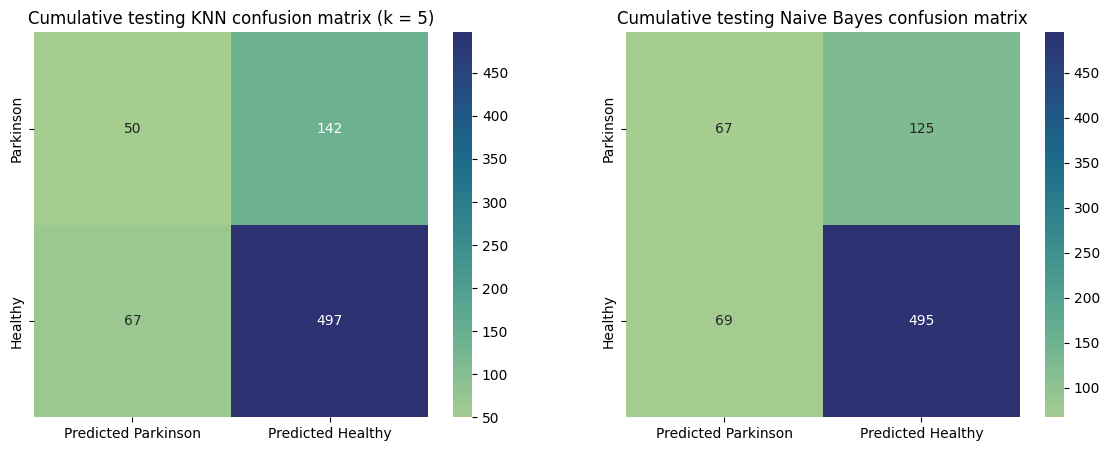

In [5]:

# Load and prepare data.
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])

df['class'] = df['class'].str.decode('utf-8')

x = df.drop("class", axis=1)
y = np.ravel(df['class'])

# --------------------------------------------------------- #

# Creates the cross-validation object we'll be using:
# - Stratified K fold cross-validation, k = 5.
folds = 10
skf_cv = StratifiedKFold(n_splits = folds, random_state = 0, shuffle = True)

# Creates the classifier objects we'll be using:
# - KNN classifier, k = 5 and using euclidean distance (p = 2);
# - Naive Bayes classifier (Gaussian assumption).
k = 5
knn_clf = KNeighborsClassifier(n_neighbors = k, weights = "uniform", p = 2)
nb_clf = GaussianNB()


# Question 7:
# Create the cumulative confusion matrices.
cumulative_knn_cf_matrix = np.zeros(shape = (2, 2))
cumulative_nb_cf_matrix = np.zeros(shape = (2, 2))


# Question 6:
# training and testing accuracies for both classifiers.
knn_acc_train, knn_acc_test = [], []
nb_acc_train, nb_acc_test = [], []


# Generate indices to split data into training and test set.
for train_index, test_index in skf_cv.split(x, y):
    # Generate the train and test splits for our data, using normalized data
    # for the input.
    x_train , x_test = x.iloc[train_index], x.iloc[test_index]
    y_train , y_test = y[train_index], y[test_index]


    # Fit both knn and NB Gaussian classifiers according to x_train and y_train.
    # Perform classification on the array of test values.
    knn_clf.fit(x_train, y_train)
    knn_pred = knn_clf.predict(x_test)

    nb_clf.fit(x_train, y_train)
    nb_pred = nb_clf.predict(x_test)
    

    # Generate the confusion matrices for knn and NB predictions.
    knn_cf_matrix = confusion_matrix(y_test, knn_pred)
    nb_cf_matrix = confusion_matrix(y_test, nb_pred)

    # Question 5:
    # Add this iteration's confusion matrices to the cumulative ones.
    cumulative_knn_cf_matrix += knn_cf_matrix
    cumulative_nb_cf_matrix += nb_cf_matrix


    # Question 6:
    # Perform classification on the array of train values.
    knn_pred_train = knn_clf.predict(x_train)
    nb_pred_train = nb_clf.predict(x_train)

    # Get train and test accuracies for both classifiers.
    knn_acc_train.append(accuracy_score(y_train, knn_pred_train))
    knn_acc_test.append(accuracy_score(y_test, knn_pred))

    nb_acc_train.append(accuracy_score(y_train, nb_pred_train))
    nb_acc_test.append(accuracy_score(y_test, nb_pred))



# Plot the confusion matrices.
knn_df = pd.DataFrame(cumulative_knn_cf_matrix, 
                      index = ['Parkinson', 'Healthy'],
                      columns = ['Predicted Parkinson', 'Predicted Healthy'])

nb_df = pd.DataFrame(cumulative_nb_cf_matrix, 
                     index = ['Parkinson', 'Healthy'],
                     columns = ['Predicted Parkinson', 'Predicted Healthy'])


plt.figure(figsize=(14, 5))

sns.color_palette("crest", as_cmap=True)

plt.subplot(121)
sns.heatmap(knn_df, annot=True, fmt='g', cmap = "crest")
plt.title("Cumulative testing KNN confusion matrix (k = 5)")

plt.subplot(122)
sns.heatmap(nb_df, annot=True, fmt='g', cmap = "crest")
plt.title("Cumulative testing Naive Bayes confusion matrix")


6. [2v] Using scipy, test the hypothesis “𝑘NN is statistically superior to Naïve Bayes regarding accuracy”, asserting whether is true.

---

KNN average train accuracy: 0.8096706832512741
KNN average test accuracy: 0.7234736842105263
Naive Bayes average train accuracy: 0.7485313552733869
Naive Bayes average test accuracy: 0.7434035087719298
pvalue_train: Ttest_relResult(statistic=22.34261160824237, pvalue=3.411262553853029e-09)
pvalue_test: Ttest_relResult(statistic=-1.45699523678738, pvalue=0.17910460024968827)


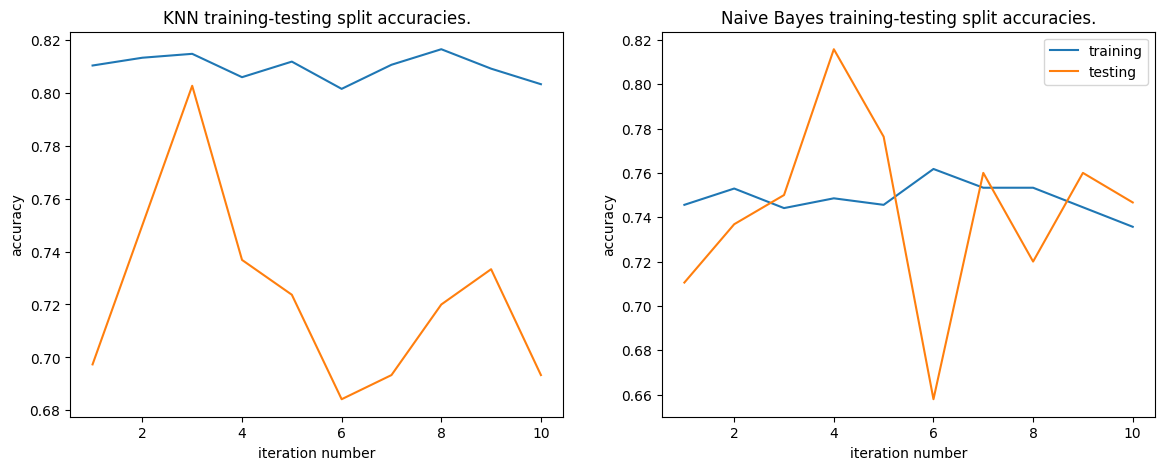

In [4]:

# Using the following results from the previous code:
# - knn_acc_train
# - knn_acc_test
# - nb_acc_train
# - nb_acc_test

print("KNN average train accuracy: " + str(np.average(knn_acc_train)) + "\n" + \
      "KNN average test accuracy: " + str(np.average(knn_acc_test)) + "\n" + \
      "Naive Bayes average train accuracy: " + str(np.average(nb_acc_train)) + "\n" + \
      "Naive Bayes average test accuracy: " + str(np.average(nb_acc_test)))


pvalue_train = ttest_rel(knn_acc_train, nb_acc_train)
pvalue_test = ttest_rel(knn_acc_test, nb_acc_test)

print("pvalue_train: " + str(pvalue_train) + "\n" + \
      "pvalue_test: " + str(pvalue_test))


x = np.arange(1, folds + 1)

# Plot the accuracies.
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.plot(x, knn_acc_train, label = "training")
plt.plot(x, knn_acc_test, label = "testing")
plt.title("KNN training-testing split accuracies.")
plt.ylabel("accuracy")
plt.xlabel("iteration number")

plt.subplot(122)
plt.plot(x, nb_acc_train, label = "training")
plt.plot(x, nb_acc_test, label = "testing")
plt.title("Naive Bayes training-testing split accuracies.")
plt.ylabel("accuracy")
plt.xlabel("iteration number")

plt.legend(loc = "upper right")

plt.show()



7. [2v] Enumerate three possible reasons that could underlie the observed differences in predictive accuracy between 𝑘NN and Naïve Bayes.

---